In [1]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Describimos la cantidad de filas y columnas
data.shape

(891, 12)

In [4]:

# Mostramos en pantalla los variables del dataset, adicional se añaden variables de tendencia central, tales como la media, quartiles, etc
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [85]:
# Se reemplazan los valores nulos, en este caso no había ningun valor nulo
data.isna().sum()
data.fillna(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,1,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1.0,1,2,W./C. 6607,23.4500,1,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Histograma**

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

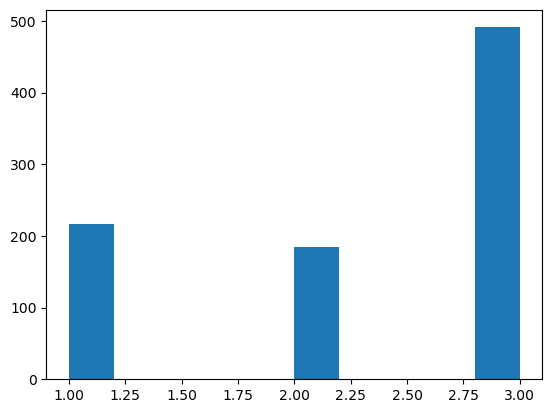

In [76]:
plt.hist(data.Pclass)

<Axes: xlabel='Sex', ylabel='Age'>

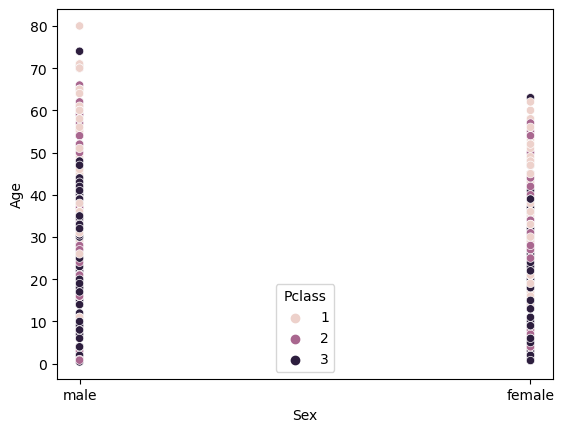

In [77]:
sns.scatterplot(x = "Sex", y = "Age", hue = "Pclass", data = data)

**Nota:** Según el histograma y diagrama de dispersion, había un solo hombre de 80 años con pasaporte clase 1 en todo el barco, y en las mujeres la clase 3 abunda más en hombres que en mujeres, adicional que los hombres en un rango de edad entre 1 a 49 años fueron más propensos a contar con pasaportes 2 y 1.

In [78]:
# Definimos cuales son las variables que trbajaremos en las predcciones, y cual es la variable objetivo
predictors_col = [ "Pclass", "Age", "SibSp", "Parch", "Fare"]
target_col = ["Survived"]

In [82]:
# Definimos las variables con las que haremos las predicciones, y variable objetivo, y les asignamos los valores del dataset
predictors = data[predictors_col]
target = data[target_col]

In [86]:
# Imprimimos en pantalla la variable con la que trabajaremos
predictors.fillna(24)

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,3,24.0,1,2,23.4500
889,1,26.0,0,0,30.0000


In [87]:
# Imprimimos en pantalla la variable objetivo
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [88]:
corr = predictors.corr()
corr

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000


**Mapa de calor**

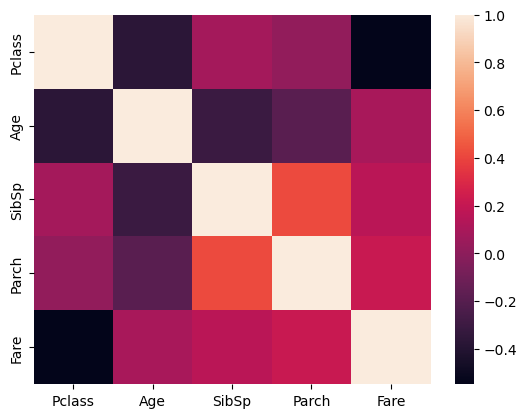

In [89]:
sns.heatmap(corr)
plt.show()

**Correlación de variables:** La presencia de los hermanos conyugues a bordo depende de los padre e hijos abordo, es decir a mayor padres e hijos estuvieran en el titanic, mayores hermanos y conyugues van a haber. Además el numero de ticketes aumenta proporcional a los padres que asistan al titanic, a mayor numero de padres, mayor numero de tickets comprados.

In [125]:
# Entrenamos el algoritmo con un porcentaje de entrenamiento del 78%
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.22, random_state=13)

In [126]:
tree = DecisionTreeClassifier()

**Entrenar el modelo configurando los diferentes hiperparámetros**

In [127]:
# Preparamos el arbol de desición con los datos de entrenamiento
arbol = tree.fit(X_train.fillna(1), y_train.fillna(1))

[Text(0.5584881756756757, 0.9736842105263158, 'x[0] <= 2.5\ngini = 0.475\nsamples = 694\nvalue = [424, 270]'),
 Text(0.19018734643734644, 0.9210526315789473, 'x[4] <= 13.679\ngini = 0.496\nsamples = 320\nvalue = [146, 174]'),
 Text(0.033783783783783786, 0.868421052631579, 'x[4] <= 7.75\ngini = 0.421\nsamples = 73\nvalue = [51, 22]'),
 Text(0.02886977886977887, 0.8157894736842105, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.0386977886977887, 0.8157894736842105, 'x[1] <= 17.5\ngini = 0.455\nsamples = 63\nvalue = [41, 22]'),
 Text(0.014742014742014743, 0.7631578947368421, 'x[4] <= 11.25\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.009828009828009828, 0.7105263157894737, 'x[1] <= 16.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.004914004914004914, 0.6578947368421053, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.014742014742014743, 0.6578947368421053, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.019656019656019656, 0.7105263157894737, 'gini = 0.0\nsam

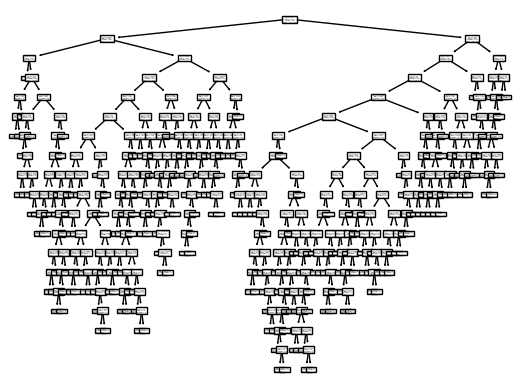

In [128]:
# Mostramos el arbol de decision
plot_tree(arbol)

In [129]:

# Realizamos las predicciones con el 22% de los datos faltantes, que son los de prueba
predicciones = arbol.predict(X_test.fillna(1))

In [130]:

# Mostramos las predicciones
predicciones

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [131]:
# Examinamos matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,0,1
Actual,,
0,89,36
1,38,34


In [132]:
# Aproximación de predicciones con valores reales
accuracy = accuracy_score(y_test, predicciones)
accuracy

0.6243654822335025


**Conclusión:** Como podemos notar, la certeza de la predicción del algoritmo, no es muy alta, por lo cual no se podría confiar mucho en la fiabilidad del algoritmo, para saber la cantidad de sobrevivientes, con el 22% de los datos restantes a los del entrenamiento, se debe mejorar el algoritmo para una predicción más precisa.